# GaiaX Alerts



GaiaX is a stream of alerts from the single field-of-view detector (1-FoV detector), as detailed in Kostrzewa-Rutkowska Z., et al., 2020. 


Operating independently from the main Gaia Alerts stream, GaiaX provides the potential for studying multimesseger astrophysics. Using the Gaia precise photometric, astrometric, and spectroscopic measurements, coupled with its all-sky, multi-epoch survey capability, make it an effective tool for detecting electromagnetic counterparts to gravitational wave events. 


You can view or download these alerts as CSV tables for specific processing runs using this link format: https://gsaweb.ast.cam.ac.uk/alerts/gaiax/gaiax_NNNN.csv (replace NNNN with the run ID). Click here for an explanation of the columns and content description. Click here for retractions.

In [38]:
from GaiaAlertsPy.alert import GaiaX_history, GaiaX_alert

import numpy as np 
from astropy.time import Time

# fancy plotting
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = "retina"
from matplotlib import rcParams
rcParams['savefig.dpi'] = 550
rcParams['font.size'] = 20
plt.rc('font', family='serif')

Load GaiaX alert release table from 2023:

In [40]:
alerts_2023 = GaiaX_history('2023')

In [81]:
alerts_2023[0:5]

Run,Earliest,Latest,No. of Alerts,Published,CSV
int64,str19,str19,int64,str19,str14
7470,2023-12-28T23:32:13,2023-12-30T07:25:11,123,2023-12-31T17:10:03,gaiax_7470.csv
7469,2023-12-27T19:10:56,2023-12-29T08:56:45,159,2023-12-31T09:50:03,gaiax_7469.csv
7468,2023-12-26T20:28:36,2023-12-28T10:28:05,121,2023-12-29T09:40:03,gaiax_7468.csv
7467,2023-12-25T09:21:04,2023-12-27T10:19:27,119,2023-12-28T09:50:03,gaiax_7467.csv
7465,2023-12-25T04:55:03,2023-12-26T12:41:48,111,2023-12-27T15:30:03,gaiax_7465.csv


Text(0, 0.5, 'Number of Alerts')

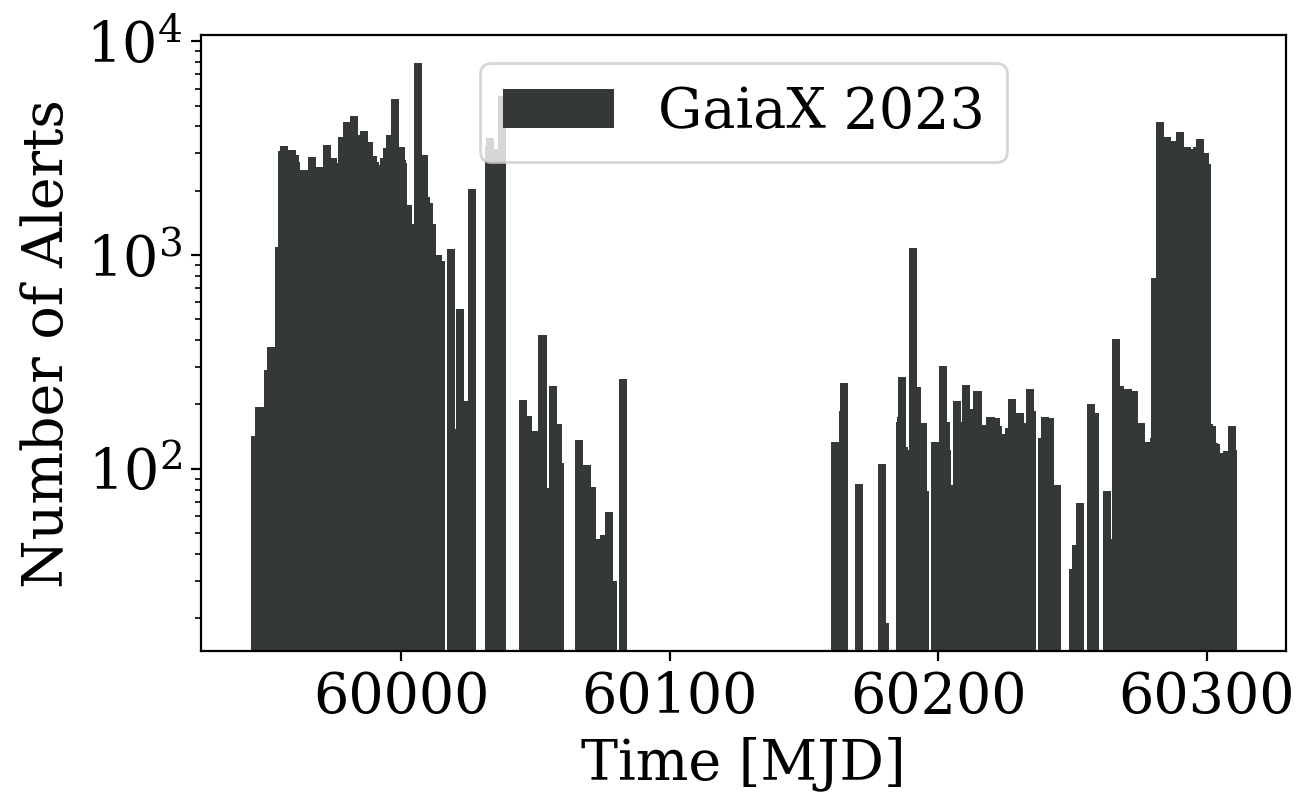

In [55]:
plt.figure(figsize=(7, 4))
plt.bar(Time(alerts_2023['Published']).mjd, alerts_2023['No. of Alerts'], color='#353935', width=3, 
        label='GaiaX 2023')
plt.legend()
plt.yscale('log')
plt.xlabel('Time [MJD]')
plt.ylabel('Number of Alerts')

Using the CSV extension, we can also load the alert data:

In [95]:
alert_hist = GaiaX_alert('gaiax_7469.csv')

alert_hist[0:5]

Name,SourceID,ObsTime,RA,Dec,GMag,GMagErr
str14,int64,str19,float64,float64,float64,float64
GaiaX23-280346,795575123163962752,2023-12-29T01:53:57,150.312982,35.333948,18.87,0.09
GaiaX23-280345,795894668734561152,2023-12-29T01:53:13,150.205548,36.134564,18.36,0.03
GaiaX23-280344,1763931334623322112,2023-12-29T01:24:05,317.471687,17.153644,20.32,0.05
GaiaX23-280343,1763915013747597440,2023-12-29T01:23:57,317.570608,17.038779,20.59,0.05
GaiaX23-280342,1763907317166204288,2023-12-28T23:37:11,317.611999,16.854227,18.73,0.03


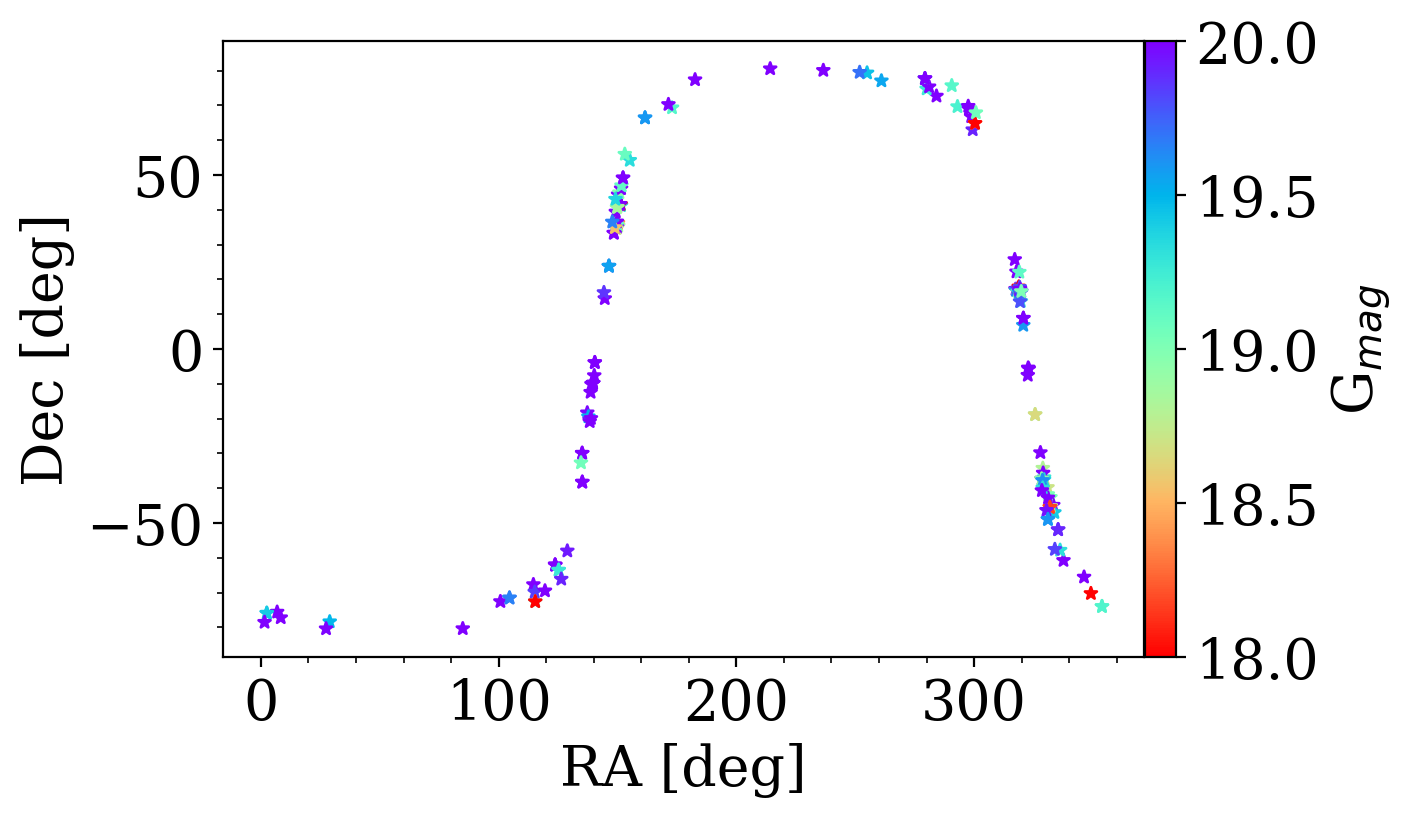

In [101]:
plt.figure(figsize=(7, 4))
plt.scatter(alert_hist['RA'], alert_hist['Dec'], c=alert_hist['GMag'], 
            cmap='rainbow_r', s=20, alpha=1, vmin=18, vmax=20., marker='*')
plt.colorbar(pad=0.001, label='G$_{mag}$')
plt.xlabel('RA [deg]')
plt.ylabel('Dec [deg]')
plt.minorticks_on()
